In [1]:
#! /usr/bin/env python

import covasim as cv
import numpy as np
import pandas as pd
from os.path import join
from copy import deepcopy
from datetime import datetime, timedelta

cv.options.set(dpi=100, show=False, close=True, verbose=0) # Standard options for Jupyter notebook


contact_dir = '/mnt/d/books/iitm/agentBased/codes/tn_contact_matrix/output/contact_matrix'
home_path = join(contact_dir, 'home_contact.csv')
school_path = join(contact_dir, 'school_contact.csv')
work_path = join(contact_dir, 'work_contact.csv')
community_path = join(contact_dir, 'community_contact.csv')


fb_dir = '/mnt/d/books/iitm/agentBased/codes/covasim/models/data/'
tile_path = join(fb_dir, 'tn_quadkey.csv')
density_path = join(fb_dir, 'pop_density.csv')
mobility_path = '/mnt/d/books/iitm/agentBased/data/fb/mobility/'

case_datafile = '/mnt/d/books/iitm/agentBased/data/tn/incovid19/covasim/state_datafile.csv'
refactor_file = '/mnt/d/books/iitm/agentBased/data/tn/incovid19/covasim/tmp_datafile.csv'

start_day, end_day = '2020-06-01', '2020-06-30'

# asymptotic_rate = 0.3
pop_infected = 10_000

age_based_infection = [0.045455, 0.009091, 0.014773, 0.00000, 0.051136, 0.022727, 0.068182, 0.102273, 0.211364, 0.029924, 0.120833, 0.117424, 0.04697, 0.063636, 0.000000, 0.096212]
tile_infection = [0., 0.00430416, 0.00215208, 0.04925873, 0.00023912,
                  0.00454328, 0.03778097, 0.02223816, 0.00621712, 0.15845688,
                  0.01721664, 0.17663   , 0.14506616, 0.01602104, 0.0215208 ,
                  0.0143472 , 0.04710665, 0.00701419, 0.04949785, 0.05499761,
                  0.02662203, 0.01960784, 0.01259366, 0.00557947, 0.01769488,
                  0.0263032 , 0.00557947, 0.00765184, 0.02941176, 0.0143472, 0.]


pars = dict(
    start_day = start_day,
    end_day = end_day,

    pop_type = 'matrix', # Use a more realistic population model
    location = 'India-TamilNadu', # Use population characteristics for Tamil-Nadu

    pop_size = 100_000,
    pop_scale = 1,
    rescale = True,
    pop_infected = pop_infected,

    home_matrix=home_path,
    school_matrix = school_path,
    work_matrix = work_path,
    community_matrix = community_path,

    tiles = tile_path,
    pop_density = density_path,
    mobility = mobility_path,

    use_waning = True,
    dynam_layer={'c': True},

    init_infection={'tiles':tile_infection, 'ages':age_based_infection},
)

Covasim 3.1.1 (2021-12-06) — © 2021 by IDM


In [2]:
# def generate_data(start, end, cases_file, refactor_file):
#     df = pd.read_csv(cases_file, delimiter=',')
#     df = df[(df['date']>=start_day) & (df['date']<=end_day)]
#     df.to_csv(refactor_file, sep=',', index=False, header=True) 

# generate_data(start_day, end_day, case_datafile, refactor_file)

In [3]:
close_school = cv.clip_edges(days=0, changes=0, layers='s')
reduce_work  = cv.clip_edges(days=0, changes=0.3, layers='w')
reduce_community = cv.clip_edges(days=0, changes=0.3, layers='c')
testing = cv.test_num(daily_tests=1000)

In [4]:
def do_sensitivity_test(pars, variable_values, name):
    msims = []
    for val in variable_values:
        pars[name] = val
        sims = []
        for seed in range(3):
            sim = cv.Sim(pars, rand_seed=seed, interventions=[close_school, reduce_work, reduce_community, testing])
            sims.append(sim)
        msim = cv.MultiSim(sims, label=f'{name} = {val}')
        msim.run()
        msim.mean()
        msims.append(msim)
    merged = cv.MultiSim.merge(msims, base=True)
    return merged

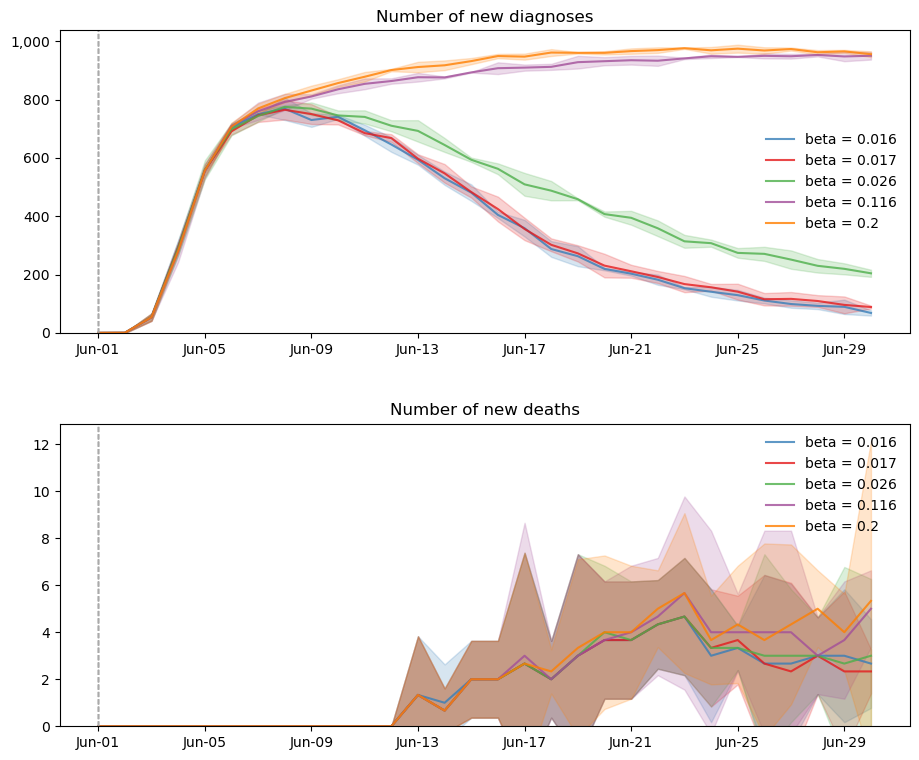

In [5]:
# beta_values = [0.016, 0.017, 0.026, 0.116, 0.20]
# beta_sensitivity = do_sensitivity_test(deepcopy(pars), beta_values, 'beta')
# beta_sensitivity.plot(to_plot=['new_diagnoses', 'new_deaths'])

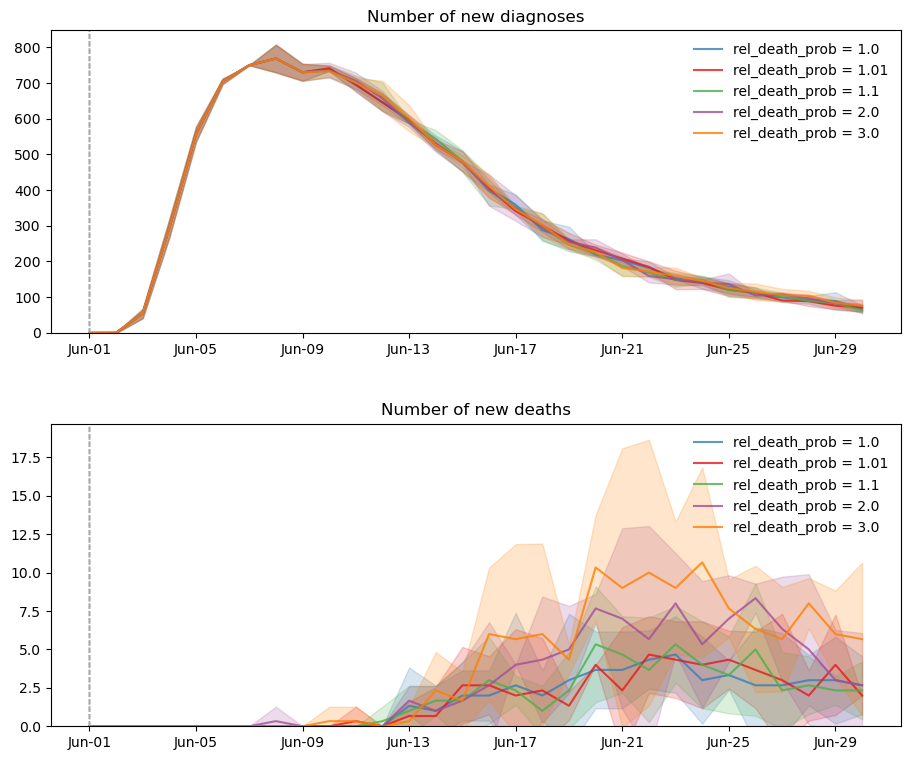

In [5]:
# rel_death_prob_values = [1.0, 1.01, 1.1, 2.0, 3.0]
# rel_death_prob_sensitivity = do_sensitivity_test(deepcopy(pars), rel_death_prob_values, 'rel_death_prob')
# rel_death_prob_sensitivity.plot(to_plot=['new_diagnoses', 'new_deaths'])

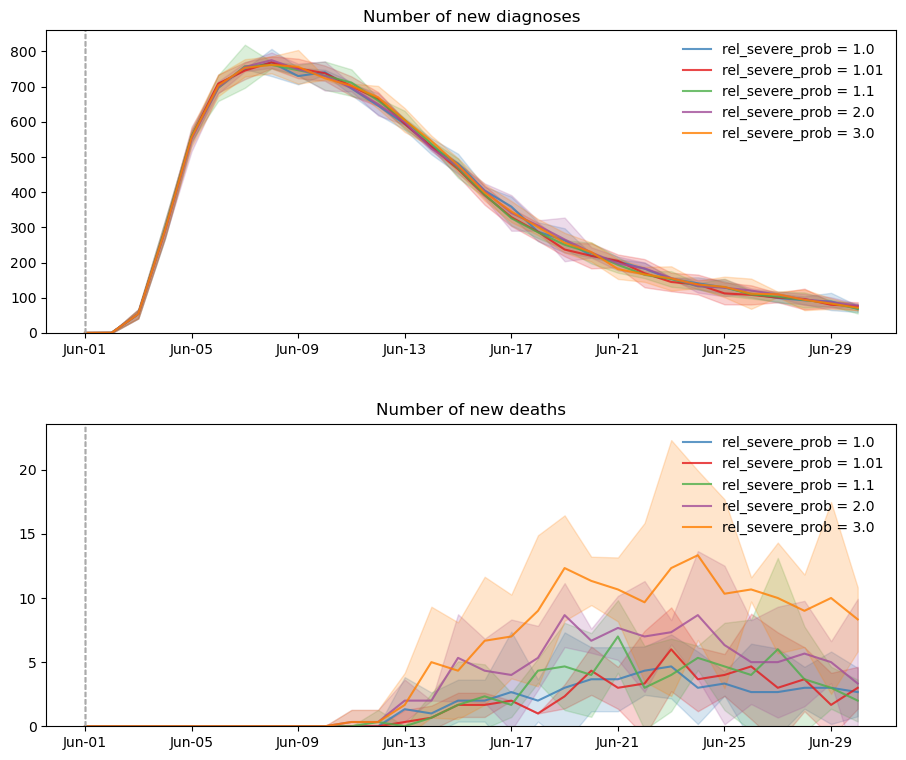

In [5]:
# rel_severe_prob_values = [1.0, 1.01, 1.1, 2.0, 3.0]
# rel_severe_prob_sensitivity = do_sensitivity_test(deepcopy(pars), rel_severe_prob_values, 'rel_severe_prob')
# rel_severe_prob_sensitivity.plot(to_plot=['new_diagnoses', 'new_deaths'])

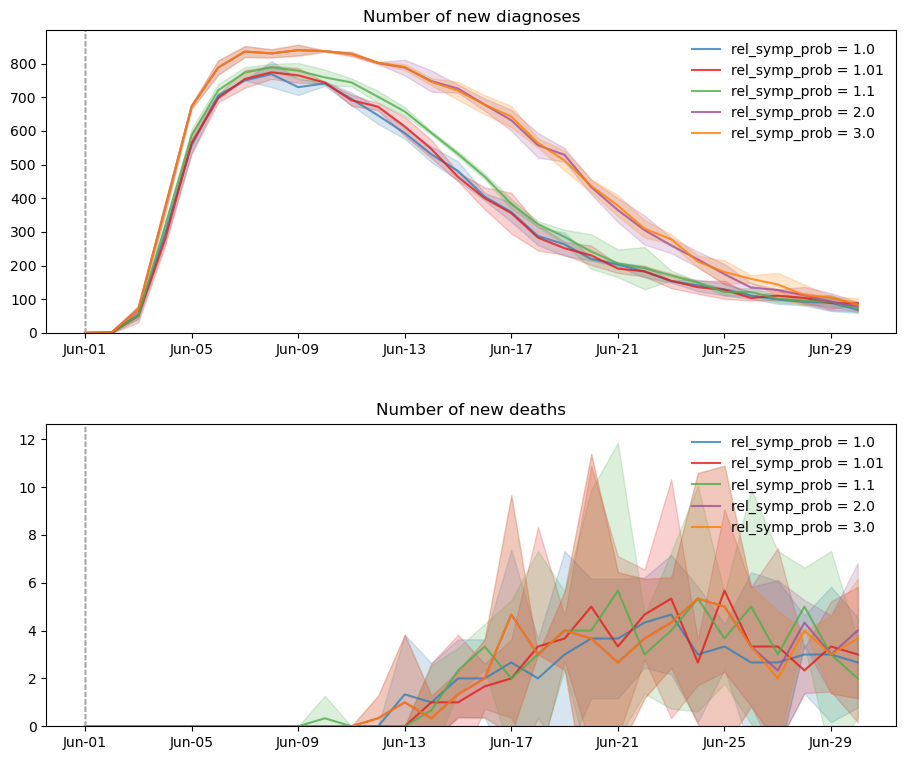

In [5]:
# rel_symp_prob_values = [1.0, 1.01, 1.1, 2.0, 3.0]
# rel_symp_prob_sensitivity = do_sensitivity_test(deepcopy(pars), rel_symp_prob_values, 'rel_symp_prob')
# rel_symp_prob_sensitivity.plot(to_plot=['new_diagnoses', 'new_deaths'])

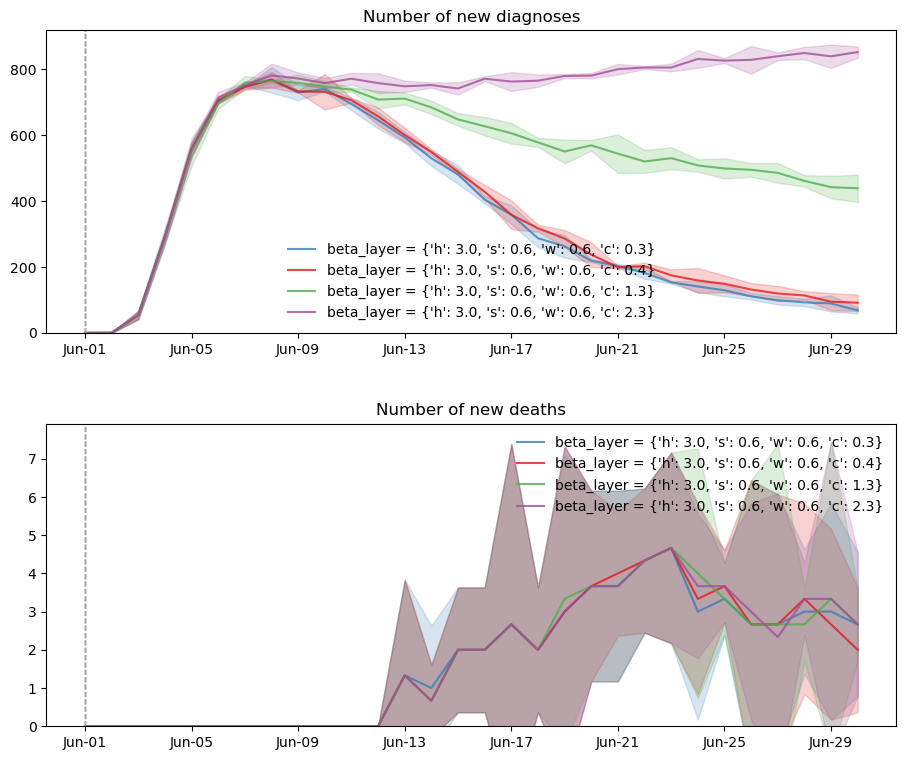

In [5]:
# beta_layer_comm_values = [0.3, 0.4, 1.3, 2.3]
# beta_layer_values = [dict(h=3.0, s=0.6, w=0.6, c=x) for x in beta_layer_comm_values]
# beta_layer_comm_sensitivity = do_sensitivity_test(deepcopy(pars), beta_layer_values, 'beta_layer')
# beta_layer_comm_sensitivity.plot(to_plot=['new_diagnoses', 'new_deaths'])

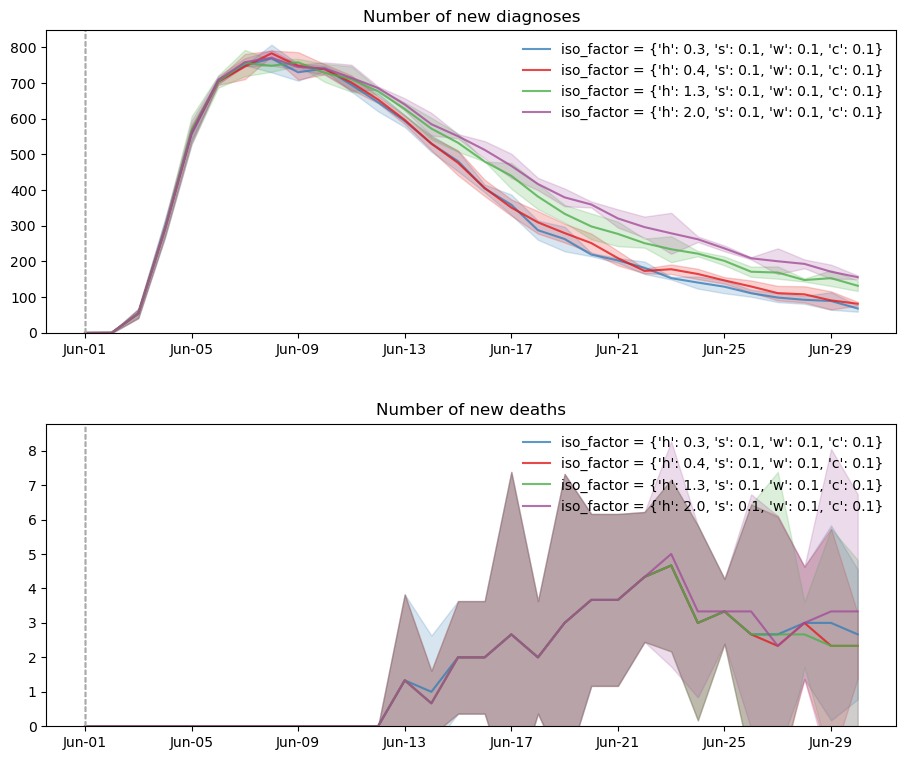

In [5]:
# iso_factor_home_values = [0.3, 0.4, 1.3, 2.0]
# iso_factor_values = [dict(h=x, s=0.1, w=0.1, c=0.1) for x in iso_factor_home_values]
# iso_factor_sensitivity = do_sensitivity_test(deepcopy(pars), iso_factor_values, 'iso_factor')
# iso_factor_sensitivity.plot(to_plot=['new_diagnoses', 'new_deaths'])

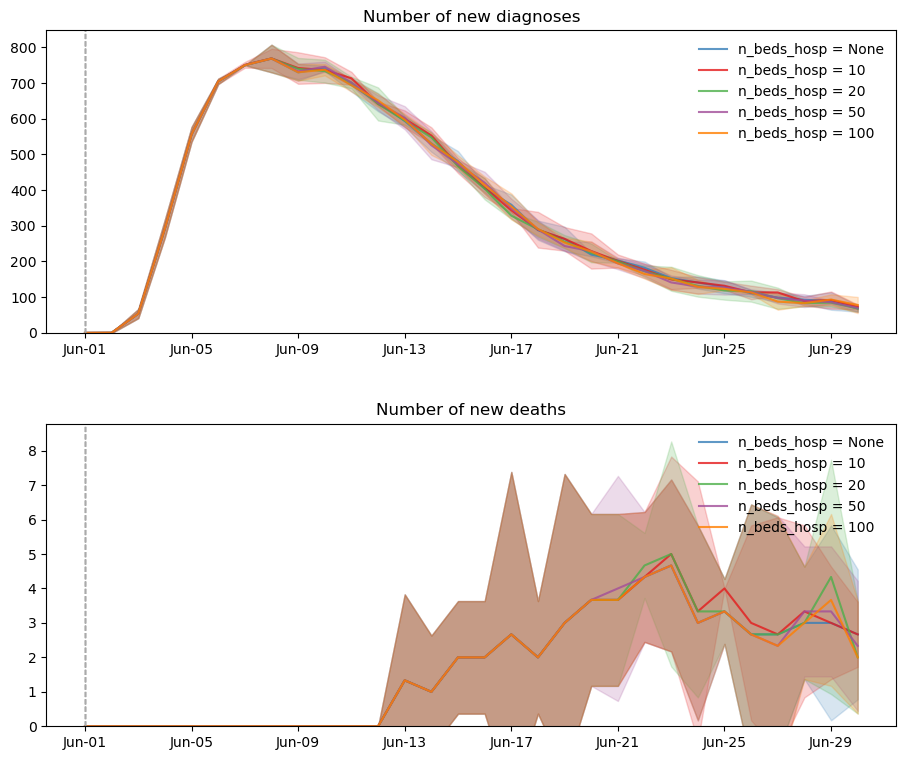

In [5]:
# n_beds_hosp_values = [None, 10, 20, 50, 100]
# n_beds_hosp_sensitivity = do_sensitivity_test(deepcopy(pars), n_beds_hosp_values, 'n_beds_hosp')
# n_beds_hosp_sensitivity.plot(to_plot=['new_diagnoses', 'new_deaths'])

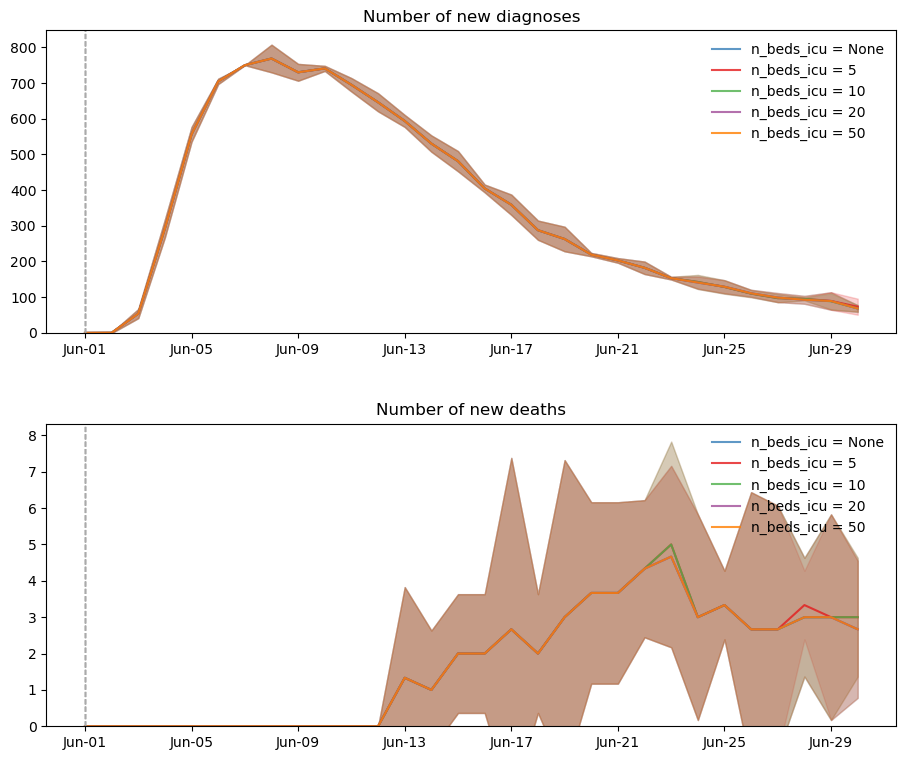

In [5]:
n_beds_icu_values = [None, 5, 10, 20, 50]
n_beds_icu_sensitivity = do_sensitivity_test(deepcopy(pars), n_beds_icu_values, 'n_beds_icu')
n_beds_icu_sensitivity.plot(to_plot=['new_diagnoses', 'new_deaths'])